## Assignment 4

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1. Implementation of PCA

In [2]:
training_data = np.array(pd.read_csv('zip.train', sep=' ', header=None))
x_train, y_train = training_data[:,1:-1], training_data[:,0]

In [3]:
class PCA:
    def __init__(self, dimenstion):
        self.d = dimenstion
        self.transformed_data = None
    
    def fit(self, data):
        mean = np.mean(data, axis=0) #mean of data
        C = data - mean #center data
        standard_deviation = np.sqrt(np.sum(np.power(C, 2), axis=0) / len(data))
        x = C/standard_deviation #standardized data
        cov = np.cov(x.T) #cvariance matrix
        eig_values, eig_vectors = np.linalg.eig(cov)

        pc = eig_vectors.T[0:self.d]
        self.transformed_data = np.dot(x, pc.T)
        
    def plot(self, lables):
        fig = plt.figure(figsize=(10, 10))
        for i in range(10):
            plt.scatter(*self.transformed_data[lables == i].T, s=3, label=str(i))
        plt.legend()
        plt.show()

In [4]:
pc_2 = PCA(dimenstion=2)
pc_2.fit(x_train)

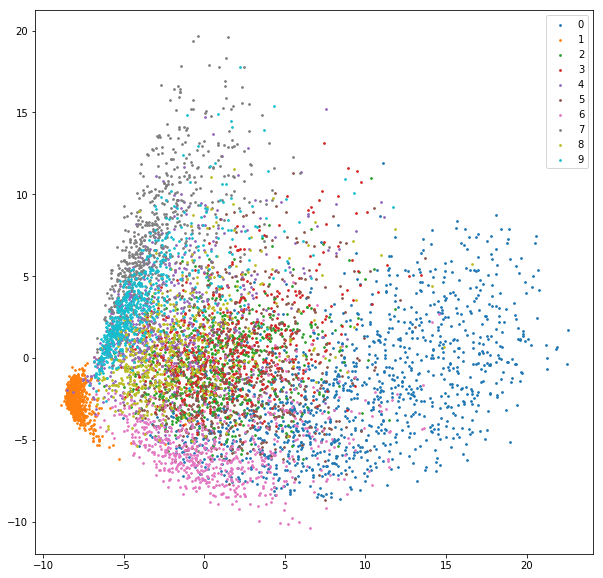

In [5]:
pc_2.plot(y_train)